In [876]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,4)
# plt.rcParams["figure.figsize"] = (8,4)


In [894]:
## Read Log File
log_dir = 'experiment_bnorm_bs4'
with open('../checkpoints/'+log_dir+'/loss_log.txt', 'r') as f:
    log = f.read()

## Create directory for saved plots    
if not os.path.exists(log_dir):
    os.makedirs(log_dir)
    
## Save Plots    
SAVE = True

## Max number of plot iterations
MAX_ITER = 1000000000



In [895]:
llog = log.split('\n')
split_llog = [e.replace('(', '').replace(')', '').replace(',', '').split() for e in llog]
# llog[:3]

In [896]:
llog[:10]

['================ Training Loss (Wed Mar 31 15:16:16 2021) ================',
 '(epoch: 1, iters: 4, lr: 0.0002000, t_comp: 1.439, t_load: 0.034) G_image: 2.297 G_person: 0.071 G_L1: 55.354 D_image_real: 2.271 D_image_fake: 1.390 D_person_real: 0.169 D_person_fake: 3.010 acc_D_image_real: 0.250 acc_D_image_fake: 0.790 acc_D_person_real: 0.930 acc_D_person_fake: 0.000 ',
 '(epoch: 1, iters: 8, lr: 0.0002000, t_comp: 1.536, t_load: 0.027) G_image: 14.824 G_person: 0.132 G_L1: 52.396 D_image_real: 11.253 D_image_fake: 14.504 D_person_real: 0.144 D_person_fake: 2.321 acc_D_image_real: 0.690 acc_D_image_fake: 0.310 acc_D_person_real: 0.960 acc_D_person_fake: 0.000 ',
 '(epoch: 1, iters: 12, lr: 0.0002000, t_comp: 1.453, t_load: 0.024) G_image: 5.768 G_person: 0.080 G_L1: 51.248 D_image_real: 5.149 D_image_fake: 6.169 D_person_real: 0.224 D_person_fake: 3.097 acc_D_image_real: 0.490 acc_D_image_fake: 0.550 acc_D_person_real: 0.920 acc_D_person_fake: 0.000 ',
 '(epoch: 1, iters: 16, lr: 0.00

In [897]:
# Create list of keys from log data
keys = [k.replace(':','') for k in split_llog[1] if ':' in k]
print('logged data:')
print(keys)

# Create empty dict for log data
log_dict = {k:[] for k in keys}
log_dict['i'] = []


# Populate log dict
count = 0
for entry in split_llog:
#     print(entry)
    if entry and entry[0] == 'epoch:' and count < MAX_ITER:
        log_dict['i'].append(count)
        count += 1
        key = ''
        for e in entry:
            if e[:-1] in keys:
                key = e[:-1]
            else:
                data = float(e) if '.' in e else int(e)
                log_dict[key].append(data)


# print(log_dict)

    

logged data:
['epoch', 'iters', 'lr', 't_comp', 't_load', 'G_image', 'G_person', 'G_L1', 'D_image_real', 'D_image_fake', 'D_person_real', 'D_person_fake', 'acc_D_image_real', 'acc_D_image_fake', 'acc_D_person_real', 'acc_D_person_fake']


In [898]:
count

24

---

## Learning Rate

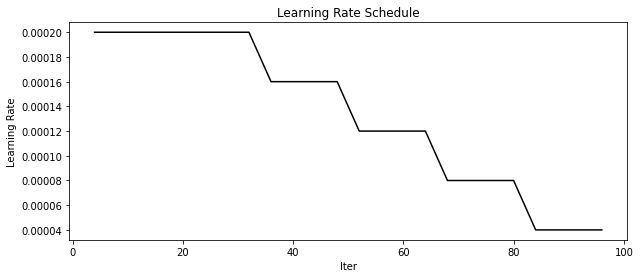

In [899]:
# Data for plotting
x = log_dict['iters']
y = log_dict['lr']
fig, ax = plt.subplots()
ax.plot(x, y, 'black')

ax.set(xlabel='Iter', ylabel='Learning Rate',
       title='Learning Rate Schedule')
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_learning_rate.png")
plt.show()

## G_image loss plot

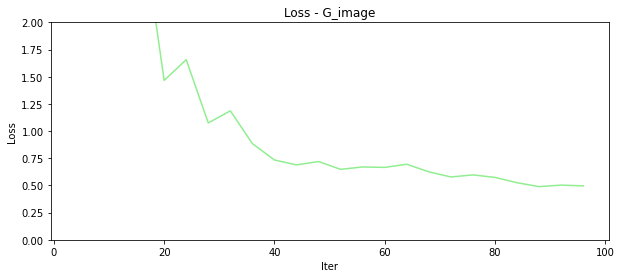

In [900]:
# Data for plotting
x = log_dict['iters']
try:
    y = log_dict['G_image']
except:
    y = log_dict['G_GAN_image']
fig, ax = plt.subplots()
ax.plot(x, y, 'lightgreen')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - G_image')
plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_G_image.png")
plt.show()



## D_image_fake loss plot

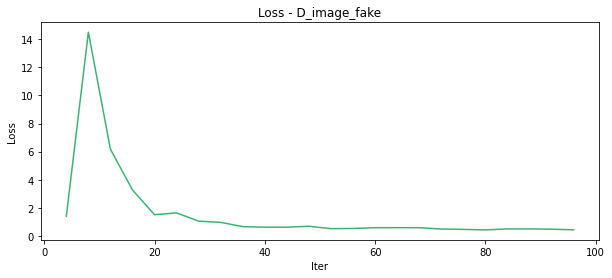

In [911]:
# Data for plotting
x = log_dict['iters']
y = log_dict['D_image_fake']
fig, ax = plt.subplots()
ax.plot(x, y, 'mediumseagreen')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - D_image_fake')
# plt.ylim(0, 1.5)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_D_image_fake.png")
plt.show()

## D_image_real loss plot

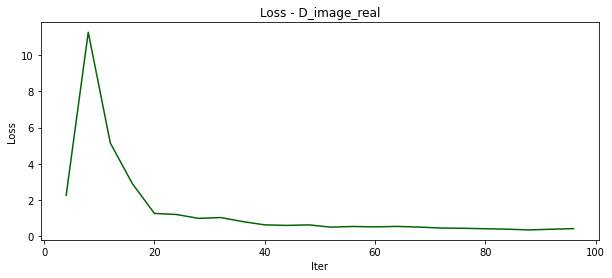

In [912]:
# Data for plotting
x = log_dict['iters']
y = log_dict['D_image_real']
fig, ax = plt.subplots()
# ax.plot(x, y, 'forestgreen')
ax.plot(x, y, 'darkgreen')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - D_image_real')
# plt.ylim(0, 1.5)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_D_image_real.png")
plt.show()

---
---
## G_person loss plot

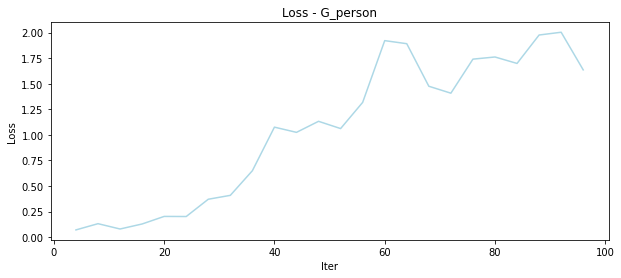

In [903]:
# Data for plotting
x = log_dict['iters']
try:
    y = log_dict['G_person']
except:
    y = log_dict['G_GAN_person']
fig, ax = plt.subplots()
ax.plot(x, y, 'lightblue')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - G_person')

# plt.ylim(0, 4)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_G_person.png")
plt.show()

## D_person_fake loss plot

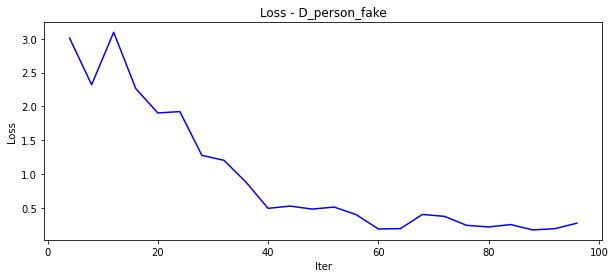

In [904]:
# Data for plotting
x = log_dict['iters']
y = log_dict['D_person_fake']
# print(x)
# print(y)
fig, ax = plt.subplots()
ax.plot(x, y, 'blue')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - D_person_fake')
# ax.grid()
# plt.xlim(0, len(log_dict['iters']))
# plt.ylim(0, 3.5)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_D_person_fake.png")
plt.show()

## D_person_real plot

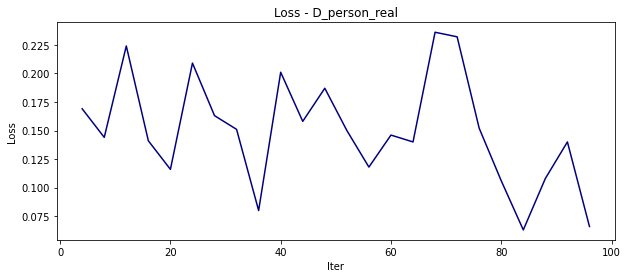

In [905]:
# Data for plotting
x = log_dict['iters']
y = log_dict['D_person_real']
# print(x)
# print(y)
fig, ax = plt.subplots()
ax.plot(x, y, 'navy')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - D_person_real')
# ax.grid()
# plt.xlim(0, len(log_dict['iters']))
# plt.ylim(0, 3.5)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_D_person_real.png")
plt.show()

---
---
## G_L1 loss plot

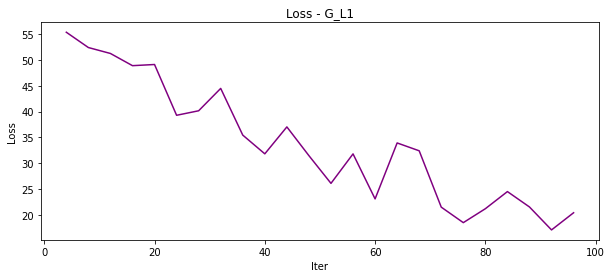

In [906]:
# Data for plotting
x = log_dict['iters']
y = log_dict['G_L1']
fig, ax = plt.subplots()
ax.plot(x, y, 'purple')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - G_L1')
# plt.ylim(0, 10)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_G_L1.png")
plt.show()

---
---
## Accuracy Plot - D Image Fake

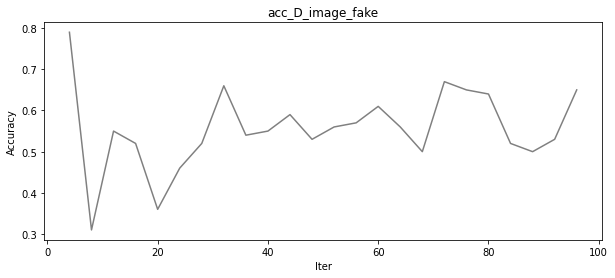

In [907]:
# Data for plotting
data_name = 'acc_D_image_fake'
x = log_dict['iters']
y = log_dict[data_name]
fig, ax = plt.subplots()
ax.plot(x, y, 'grey')

ax.set(xlabel='Iter', ylabel='Accuracy',
       title=data_name)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_"+data_name+".png")
plt.show()

## Accuracy Plot - D Image Real

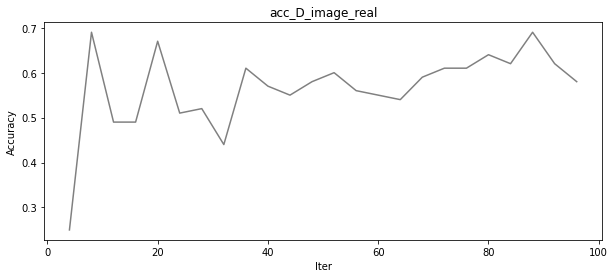

In [908]:
# Data for plotting
data_name = 'acc_D_image_real'
x = log_dict['iters']
y = log_dict[data_name]
fig, ax = plt.subplots()
ax.plot(x, y, 'grey')

ax.set(xlabel='Iter', ylabel='Accuracy',
       title=data_name)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_"+data_name+".png")
plt.show()

## Accuracy Plot - D Person Fake

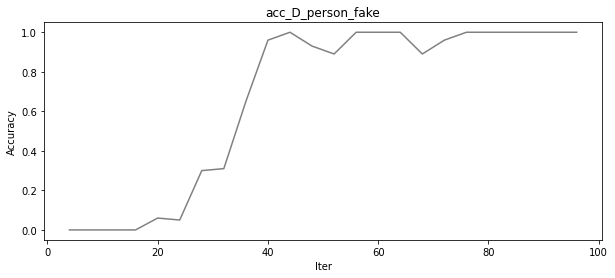

In [909]:
# Data for plotting
data_name = 'acc_D_person_fake'
x = log_dict['iters']
y = log_dict[data_name]
fig, ax = plt.subplots()
ax.plot(x, y, 'grey')

ax.set(xlabel='Iter', ylabel='Accuracy',
       title=data_name)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_"+data_name+".png")
plt.show()

## Accuracy Plot - D Person Real

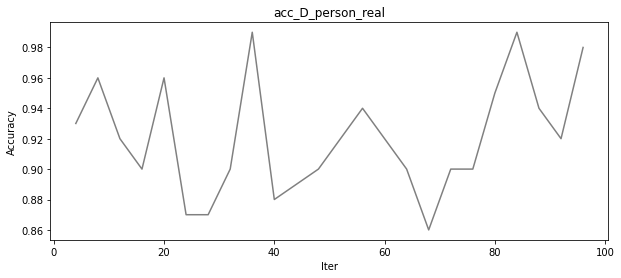

In [910]:
# Data for plotting
data_name = 'acc_D_person_real'
x = log_dict['iters']
y = log_dict[data_name]
fig, ax = plt.subplots()
ax.plot(x, y, 'grey')

ax.set(xlabel='Iter', ylabel='Accuracy',
       title=data_name)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_"+data_name+".png")
plt.show()